# HW_PCA_Superconductivity

## Data preparation

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
import seaborn


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [106]:
superconduct_data = pd.read_csv("train.csv")
elem = pd.read_csv("unique_m.csv")
cond_data = pd.concat([superconduct_data, elem], axis = 1)


In [107]:
cond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Columns: 170 entries, number_of_elements to material
dtypes: float64(157), int64(12), object(1)
memory usage: 27.6+ MB


In [108]:
cond_data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [109]:
cond_data = cond_data.drop(['material'], axis=1)

### Разделите данные на обучающую и тестовую выборки, на первой вы будете оценивать коэффициенты, на второй вычислять метрику. Стандартизируйте ваши данные (но не целеую переменную). Важный момент, вы должны рассчитать среднее и стандартное отклонение на тренировочных данных, после чего трансформировать тестовые данные с помощью этого среднего и стандартного отклонения. Если непонятно, зачем, то представьте, что вам пришел один тестовый пример.
### Постройте линейную модель, которая по всем имеющимся у вас признакам предсказывает критическую температуру, посмотрите на adjusted R-squared.  Хорошая ли получилась модель?

### AIM: Predict critical temperature

## Model

In [10]:
X = cond_data.drop(columns="critical_temp")
y = cond_data["critical_temp"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.82)

In [13]:
scaler = StandardScaler().fit(X_train)

In [14]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = lin_reg.predict(X_test)

In [17]:
r2_score(y_test, y_pred)

0.4072155551081661

## PCA 

In [3]:
import os
import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


from scipy.stats import norm
from sklearn.decomposition import PCA # Основной класс, который нам нужен
from sklearn.preprocessing import StandardScaler # Стандартизация, обязательно воспользуйтесь именно этим классом

In [19]:
from sklearn.decomposition import PCA

In [20]:
# Создаем класс PCA, указывая нужное число компонент
pca = PCA(4)
pca.fit(X_train)

PCA(n_components=4)

In [22]:
X_reduced = pca.transform(X_test)
X_reduced

array([[-3.22835321,  0.70925458, -3.14432363,  1.34154238],
       [-4.38010376,  0.12593477, -3.64434146,  0.7299946 ],
       [-5.52469349, -0.3000015 ,  0.88166212,  0.36482844],
       ...,
       [ 6.1095129 ,  0.84429844,  0.21932886,  0.45994019],
       [-5.17967229,  0.49434256,  0.09833412,  1.80899475],
       [ 5.79196172, -3.900223  ,  3.19444678,  3.05991392]])

In [ ]:
# Создаем класс PCA, указывая нужное число компонент
# Можно не указывать ничего, тогда будет вычисленно
# столько компонент, сколько у вас признаков, но это может быть долго :)
pca = PCA(n_components=X_scRNAseq.shape[1])

# Метод fit вычисляет коэффициенты для PC
pca.fit(X_scRNAseq)

# Чтобы трансформировать данные нужно сделать следующее: - мы трансформируем тестовые
# X_reduced = pca.transform(X_scRNAseq) (также есть метод fit_transform)

In [71]:
def shuffle_dataset(dataset):
    """
    Мешаем данные
    """
    random_data =  {}
    for col in dataset.columns:
        random_data[col] = np.random.permutation(dataset.loc[:, col].values)
    random_data = pd.DataFrame(random_data)
    
    return random_data


def get_variance_by_chance(dataset, n_replics, n_components):
    """
    Считаем, сколько дисперсии объясняет каждая PC для перемешанных данных
    """
    variance_explained_by_chance = np.zeros((n_replics, n_components))
    
    for i in tqdm.tqdm_notebook(range(n_replics)):
        if i % 100 == 0:
            print(f"{i} iter")

        random_data = shuffle_dataset(dataset)
        random_pca = PCA(n_components=n_components)
        random_pca.fit(random_data)
        variance_explained_by_chance[i, :] = random_pca.explained_variance_ratio_
        
    return variance_explained_by_chance


def get_pc_variance(dataset, n_components):
    """
    Считаем, сколько дисперсии объясняет каждая PC для реальных данных
    """
    pca = PCA(n_components=n_components)
    pca.fit(dataset)
    
    return pca.explained_variance_ratio_


# Дальше идет ряд графиков для визуализации

def plot_mean_and_ci(ax, values, label, ci_level=0.95, alpha_transparency=0.5, color_mean=None, color_shading=None):
    mean = values.mean(axis=0)
    
    std = values.std(axis=0)
    n = values.shape[1]
    se = std / np.sqrt(n) 
    
    q_alpha = (1-ci_level) / 2
    ci_num = np.abs(norm.ppf(q_alpha, loc=0, scale=1))
    
    lb = mean -  ci_num * se
    ub = mean + ci_num * se
    
    ax.fill_between(range(mean.shape[0]), ub, lb,
                     color=color_shading, alpha=alpha_transparency)
    
    ax.plot(mean, c=color_mean, lw=3, label=label)
    
    
def plot_explained_variance(ax, variance):
    ax.plot(variance, label="real", lw=3)
    ax.scatter(np.arange(0, variance.shape[0]), variance)
    
    
def plot_variance_by_change(ax, variance_by_chance):
    plot_mean_and_ci(ax, variance_by_chance, label="chance", color_mean="red", color_shading="red")


def plot_explained_vs_chance(ax, explained_variance, variance_by_chance, dataset_name, step=1):
    plot_explained_variance(ax, explained_variance)
    plot_variance_by_change(ax, variance_by_chance)

    ax.set_title(f"PCA {dataset_name}", size=35)
    ax.set_xlabel("Component number", size=25)
    ax.set_ylabel("Explained variance ratio", size=25)
    ax.set_xticks(np.arange(0, explained_variance.shape[0], step))
    ax.set_xticklabels(np.arange(1, explained_variance.shape[0]+1, step), size=20)

    ax.tick_params(labelsize=20, size=10)
    ax.set_ylim(0, explained_variance[0] + 0.1 )
    ax.legend(fontsize=20)

    
def plot_pval_plot(ax, p_values, dataset_name, alpha_level = 0.05, logscale=True, step=1):
    if logscale:
        p_values = -np.log10(p_values)
        alpha_level = -np.log10(alpha_level)

    
    ax.set_title(f"PC significance, {dataset_name}", size=35)
    ax.plot(p_values, lw=3)
    ax.scatter(np.arange(0, p_values.shape[0]), p_values, lw=3)

    ax.set_xlabel("Component number", size=25)
    ax.set_ylabel("-log(pvalue + eps)", size=25)
    ax.set_xticks(np.arange(0, p_values.shape[0], step))
    
    ax.set_xticklabels(labels = np.arange(1, p_values.shape[0]+1, step), size=20)
    ax.tick_params(labelsize=20, size=10)
    

    ax.hlines(y=alpha_level, xmin=0, xmax=p_values.shape[0], color="red", linestyles="dashed", lw=3)


def calc_permutat_pval(real_values, permut_values, eps=None):
    """
    Сравниваем долю объясненной дисперсии для реальных данных и для перемешанных
    """
    eps = eps or (1 / (permut_values.shape[0] * 10))
    
    p_values = np.zeros_like(real_values)
    for i in range(0, p_values.shape[0], 1):
        p_values[i] = (permut_values[:, i] >= real_values[i]).mean() + eps
    return p_values

    
def pca_analysis(ax1, ax2, dataset, title, n_components = None, n_replics = 1000, step=1):
    """
    Главная функция, которая просто запускает все, что выше
    """
    n_components = n_components or dataset.shape[1]
    explained_variance = get_pc_variance(dataset, n_components)
    variance_by_chance = get_variance_by_chance(dataset, n_replics, n_components)
    p_values = calc_permutat_pval(explained_variance, variance_by_chance)
    plot_explained_vs_chance(ax1, explained_variance, variance_by_chance, title)
    plot_pval_plot(ax2, p_values, title)

In [69]:
X_conduct= cond_data.iloc[:, 0:(cond_data.shape[1] - 1)]
Y_conduct = cond_data.iloc[:, cond_data.shape[1] - 1]

<ipython-input-71-4800d10539b4>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(n_replics)):


0 iter



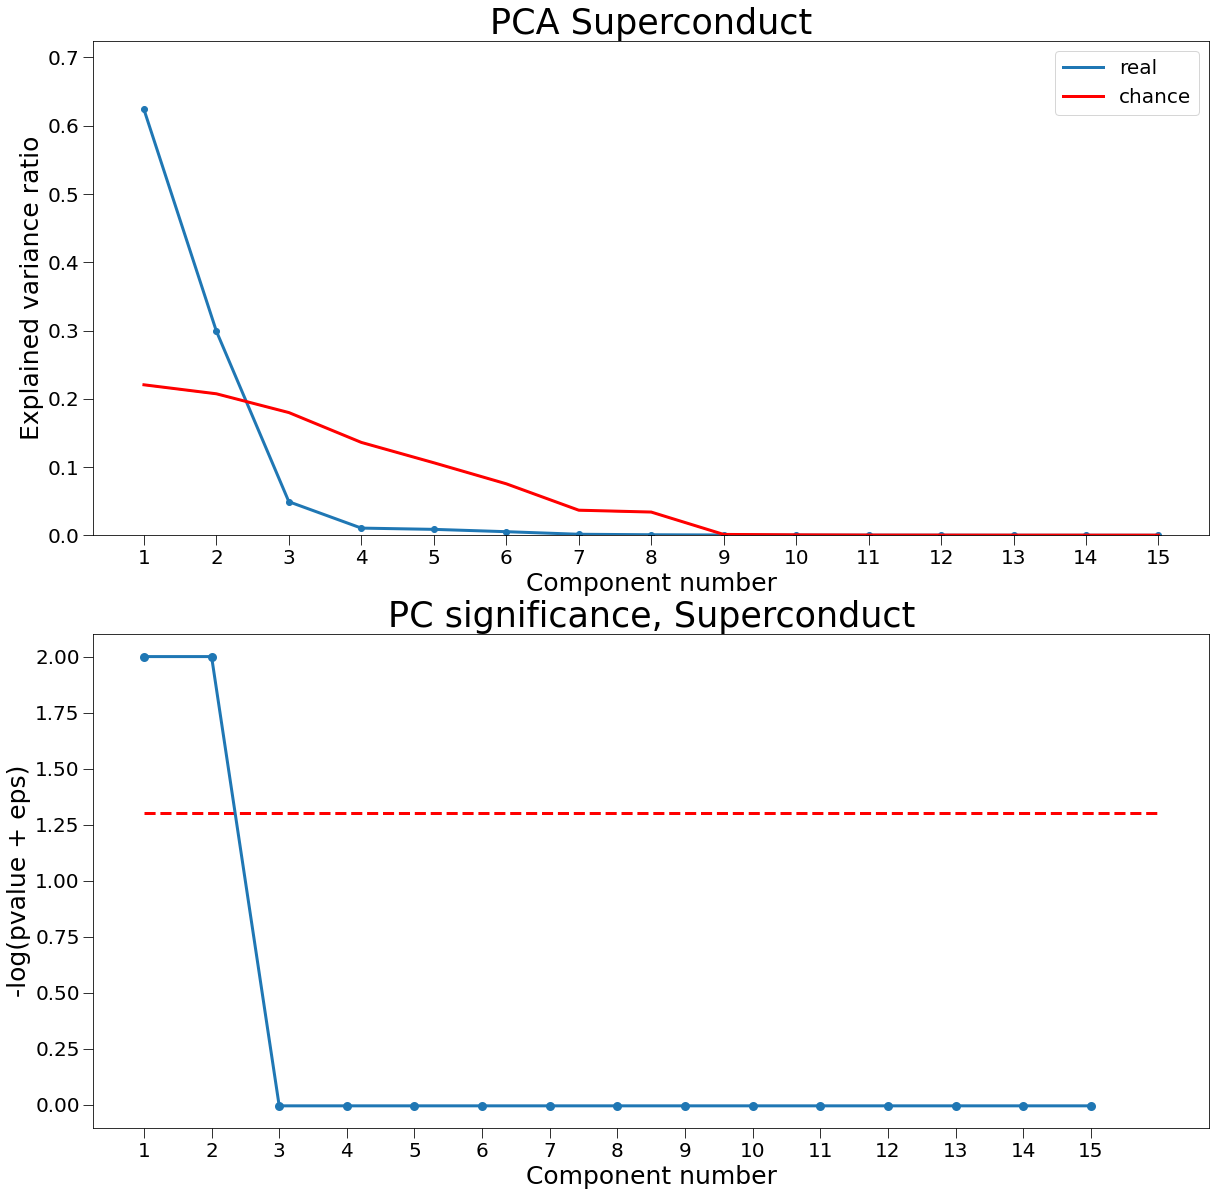

In [72]:
f, (ax1, ax2) = plt.subplots(2, 1)
f.set_figheight(20)
f.set_figwidth(20)
pca_analysis(ax1, ax2,X_conduct, "Superconduct", n_replics=10, n_components=15)

Получается, что для нашего анализа можно оставить 4 компоненты

In [144]:
after_pca = cond_data[["mean_ElectronAffinity", "mean_fie", "mean_FusionHeat", "mean_Density"]]
after_pca.head()

,mean_ElectronAffinity,mean_fie,mean_FusionHeat,mean_Density
0,81.8375,775.425,6.9055,4654.35725
1,90.8900,766.440,7.7844,5821.48580
2,81.8375,775.425,6.9055,4654.35725
3,81.8375,775.425,6.9055,4654.35725
4,81.8375,775.425,6.9055,4654.35725


In [145]:
X_4 = after_pca
y_4 = cond_data["critical_temp"]

In [146]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.82)

In [147]:
scaler = StandardScaler().fit(X_train_4)

In [148]:
X_train_4 = scaler.transform(X_train_4)
X_test_4 = scaler.transform(X_test_4)

In [149]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_4, y_train_4)

LinearRegression()

In [150]:
y_pred_4 = lin_reg.predict(X_test_4)

In [151]:
r2_score(y_test_4, y_pred_4)

0.2528285130699637

### kernel PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA



In [2]:
X_conduct= cond_data.iloc[:, 0:(cond_data.shape[1] - 1)]
Y_conduct = cond_data.iloc[:, cond_data.shape[1] - 1]

NameError: name 'cond_data' is not defined

In [ ]:

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X_conduct)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)


# scRNA-seq
Возьмем данные секвенирования надпочечников взрослой мыши

## t-SNE

In [38]:
df = pd.read_csv("GSM4409674_mouse_AdultArenalGland_1_dge.txt", sep="\t")

In [39]:
df.head(10)

,GENE,AAGCGGGAATTAAAAACG,AAGCGGCCAGACCAACAA,AAGCGGCGAGTATGGATG,AACCTAGAACGCACCTGA,AACCTACATCCCATTCCA,CTCGCACTCGCAACGTTG,AAGCGGCCTTTCGTCCCG,AACCTATATTGTTATGTA,AAGCGGGGCTGCCTCGCA,...,ACACCCTGAAGCGCTGTG,ACGTTGAGGACTAAGTAC,ACGTTGAGGACTTTAACT,ATCAACGCCTAGTAAGGG,ATCTCTTTTAGGAGTCGT,CATGATGGGTTTGCAGGA,CATGATTGCAATGCGAAT,CCAGACCGAGTACTCCAT,CGAGTAGCTGTGTGAAGC,CGGCAGAGGACTCGCTTG
0,0610005C13Rik,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0610006L08Rik,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0610007P14Rik,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0610009B22Rik,1,0,1,0,0,2,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0610009E02Rik,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0610009L18Rik,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0610009O20Rik,0,1,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0610010F05Rik,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0610010K14Rik,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0610012G03Rik,3,2,2,1,1,1,3,2,2,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df = df.set_index(df.columns[0])
dft = df.T
dft.head(10)

GENE,0610005C13Rik,0610006L08Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,...,n-R5-8s1,n-R5s136,n-R5s151,n-R5s161,n-R5s196,n-R5s2,n-R5s205,n-R5s211,n-R5s33,n-R5s77
AAGCGGGAATTAAAAACG,0,0,0,1,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
AAGCGGCCAGACCAACAA,0,0,1,0,0,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
AAGCGGCGAGTATGGATG,0,0,0,1,0,0,2,0,0,2,...,1,0,0,0,0,0,0,0,0,0
AACCTAGAACGCACCTGA,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
AACCTACATCCCATTCCA,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CTCGCACTCGCAACGTTG,0,0,0,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
AAGCGGCCTTTCGTCCCG,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
AACCTATATTGTTATGTA,0,0,0,1,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
AAGCGGGGCTGCCTCGCA,0,0,1,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
CTCGCATGTCACCTTCTG,0,0,0,1,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
from sklearn.decomposition import PCA
import pandas as pd
pca_scores = PCA().fit_transform(dft)
# create a dataframe of pca_scores
df_pc = pd.DataFrame(pca_scores)

# perform t-SNE on PCs scores
# we will use first 50 PCs but this can vary
from sklearn.manifold import TSNE
tsne_em = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12, n_iter=1000, learning_rate=368, verbose=1).fit_transform(df_pc.loc[:,0:49])
# output

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.049s...
[t-SNE] Computed neighbors for 10000 samples in 7.484s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.809488
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.058929
[t-SNE] KL divergence after 1000 iterations: 2.262136


In [44]:
pip install bioinfokit

     |████████████████████████████████| 84 kB 1.5 MB/s            
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-py3-none-any.whl size=56748 sha256=92ba0ebf4595bac8575347c14af61fcedf6e78bc53511fd6167e0a0be610badc
  Stored in directory: /Users/samira/Library/Caches/pip/wheels/40/b8/82/23dd1b441e2c834181d4c595cff79f091212eb2c482e0550e2
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7098 sha256=5c809af51adee17dd483f4d78962eed7651a9cd213850168abca3191645e44ea
  Stored in directory: /Users/samira/Library/Caches/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.6-py3-none-any.whl size=32062 sha256=5462aacae1e1d562addbe03a7c8177e2e7fb1723dec8d978dc0463b2262969b1
  Stored in directory: /Users/samira/Library/Caches/pip/wheels/82/e4/64/dd790d42

In [46]:
from bioinfokit.visuz import cluster
cluster.tsneplot(score=tsne_em)

In [103]:
from sklearn.cluster import DBSCAN

get_clusters = DBSCAN(eps=4, min_samples=70).fit_predict(tsne_em)  #оценивать качество кластеризации можно с помощью коэффциента Silhuette
# check unique clusters
# -1 value represents noisy points could not assigned to any cluster
set(get_clusters)


{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [86]:
# get t-SNE plot with colors assigned to each cluster
cluster.tsneplot(score=tsne_em, colorlist=get_clusters, 
    colordot=('#713e5a', '#63a375', '#edc79b', '#d57a66', '#ca6680', '#395B50', '#92AFD7', '#b0413e', '#4381c1', '#736ced', '#631a86', '#de541e', '#022b3a', '#000000'), 
    legendpos='upper right', legendanchor=(1.15, 1))

![alt text](tsne_2d.png "scRNA-seq tsne")


не очень удачно(

## U-MAP

In [92]:
import umap

In [96]:
dft = np.log2(dft.to_numpy() + 1)

In [100]:
adrenals_umap = umap.UMAP(random_state=999, n_neighbors=30, min_dist=.25)
# Fit UMAP and extract latent vars 1-2
embedding = pd.DataFrame(adrenals_umap.fit_transform(dft), columns = ['UMAP1','UMAP2'])
# Produce sns.scatterplot and pass metadata.subclasses as color
sns_plot = sns.scatterplot(x='UMAP1', y='UMAP2', data=embedding, alpha=.1, linewidth=0, s=1)
# Adjust legend
sns_plot.legend(loc='center left', bbox_to_anchor=(1, .5))
# Save PNG
sns_plot.figure.savefig('umap_scatter.png', bbox_inches='tight', dpi=500)

/Users/samira/opt/anaconda3/lib/python3.8/site-packages/umap/rp_tree.py:777: UserWarning: Random Projection forest initialisation failed due to recursionlimit being reached. Something is a little strange with your data, and this may take longer than normal to compute.
  warn(


SystemError: CPUDispatcher(<function nn_descent at 0x7fa66811dc10>) returned a result with an error set